In [1]:
import pandas, glob
import matplotlib.pyplot as plt

In [2]:
def load_as_dataframe(file_pattern, rows=[1,-1]):
    start_date = []; end_date = []
    for this_file in glob.glob(file_pattern):
        with open(this_file) as file:
            lines = file.readlines()
            start_date.append(lines[rows[0]].strip())
            end_date.append(lines[rows[1]].strip())
    df = pandas.DataFrame({
        'start_date': pandas.to_datetime(start_date, format='%Y-%m-%d_%H:%M:%S_%f'),
        'end_date': pandas.to_datetime(end_date, format='%Y-%m-%d_%H:%M:%S_%f')
    })
    return df

In [3]:
def calc_diff_in_seconds(date_diff):
    df2 = date_diff.dt.components
    return df2.minutes*60 + df2.seconds + df2.milliseconds/1e3 + df2.microseconds/1e6 + df2.nanoseconds/1e9

For nesh-fe3,

In [4]:
conda_home = load_as_dataframe('./nesh-fe3_logs/conda-home*.log')
singularity_home = load_as_dataframe('./nesh-fe3_logs/singularity-home*.log')
conda_work = load_as_dataframe('./nesh-fe3_logs/conda-work*.log')
singularity_work = load_as_dataframe('./nesh-fe3_logs/singularity-work*.log')

In [5]:
df = pandas.DataFrame({
    'conda_home': calc_diff_in_seconds(conda_home['end_date'] - conda_home['start_date'])-60,
    'singularity_home': calc_diff_in_seconds(singularity_home['end_date'] - singularity_home['start_date'])-60,
    'conda_work': calc_diff_in_seconds(conda_work['end_date'] - conda_work['start_date'])-60,
    'singularity_work': calc_diff_in_seconds(singularity_work['end_date'] - singularity_work['start_date'])-60
})

Text(0.5, 1.0, 'nesh-fe3')

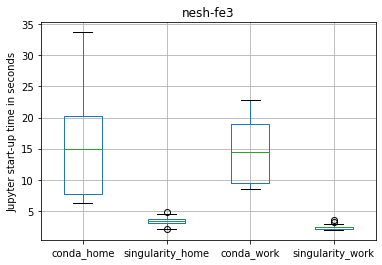

In [6]:
df.boxplot(); plt.ylabel('Jupyter start-up time in seconds'); plt.title('nesh-fe3')

For desktop,

In [7]:
conda = load_as_dataframe('./morpheus_logs/conda*.log')
singularity = load_as_dataframe('./morpheus_logs/singularity*.log', rows=[2,-1])

In [8]:
df = pandas.DataFrame({
    'conda_home': calc_diff_in_seconds(conda['end_date'] - conda['start_date'])-60,
    'singularity_home': calc_diff_in_seconds(singularity['end_date'] - singularity['start_date'])-60
})

Text(0.5, 1.0, 'desktop computer')

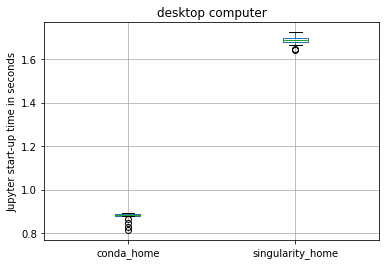

In [9]:
df.boxplot(column=['conda_home', 'singularity_home']);
plt.ylabel('Jupyter start-up time in seconds'); plt.title('desktop computer')

For scalc05,

In [10]:
conda_home = load_as_dataframe('./scalc05_logs/conda-home*.log')
singularity_home = load_as_dataframe('./scalc05_logs/singularity-home*.log')
conda_data = load_as_dataframe('./scalc05_logs/conda-data*.log')
singularity_data = load_as_dataframe('./scalc05_logs/singularity-data*.log')
singularity_tmp = load_as_dataframe('./scalc05_logs/singularity-tmp*.log')

In [11]:
df = pandas.DataFrame({
    'conda_home': calc_diff_in_seconds(conda_home['end_date'] - conda_home['start_date'])-60,
    'singularity_home': calc_diff_in_seconds(singularity_home['end_date'] - singularity_home['start_date'])-60,
    'conda_data': calc_diff_in_seconds(conda_data['end_date'] - conda_data['start_date'])-60,
    'singularity_data': calc_diff_in_seconds(singularity_data['end_date'] - singularity_data['start_date'])-60,
    'singularity_tmp': calc_diff_in_seconds(singularity_tmp['end_date'] - singularity_tmp['start_date'])-60
})

Text(0.5, 1.0, 'scalc05')

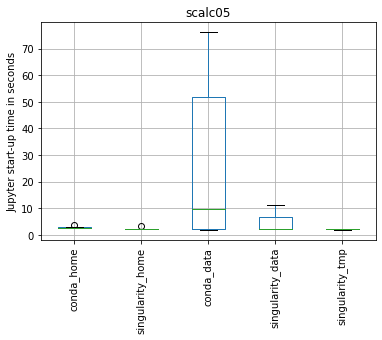

In [12]:
df.boxplot(rot=90); plt.ylabel('Jupyter start-up time in seconds'); plt.title('scalc05')

Python environment,

In [13]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: linux-64
@EXPLICIT
https://repo.anaconda.com/pkgs/main/linux-64/_libgcc_mutex-0.1-main.conda
https://conda.anaconda.org/conda-forge/linux-64/ca-certificates-2020.12.5-ha878542_0.tar.bz2
https://repo.anaconda.com/pkgs/main/linux-64/ld_impl_linux-64-2.33.1-h53a641e_7.conda
https://conda.anaconda.org/conda-forge/linux-64/libgfortran4-7.5.0-h14aa051_19.tar.bz2
https://repo.anaconda.com/pkgs/main/linux-64/libstdcxx-ng-9.1.0-hdf63c60_0.conda
https://conda.anaconda.org/conda-forge/linux-64/pandoc-2.13-h7f98852_0.tar.bz2
https://repo.anaconda.com/pkgs/main/noarch/tzdata-2020d-h14c3975_0.conda
https://repo.anaconda.com/pkgs/main/linux-64/libgcc-ng-9.1.0-hdf63c60_0.conda
https://conda.anaconda.org/conda-forge/linux-64/libgfortran-ng-7.5.0-h14aa051_19.tar.bz2
https://repo.anaconda.com/pkgs/main/linux-64/expat-2.4.1-h2531618_2.conda
https://conda.anaconda.org/conda-forge/linux-64/ic